In [1]:
# Import Pandas Library, used for data manipulation
# Import matplotlib, used to plot our data
# Import nump for mathemtical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# Import our WeatherDataM and store it in the variable weather_data_m
weather_data_m = pd.read_csv("Data/WeatherDataM.csv") 
# Display the data in the notebook
weather_data_m
weather_data_m.columns

Index(['Temperature (C)', 'Wind Speed (km/h)', 'Pressure (millibars)',
       'Humidity'],
      dtype='object')

In [2]:
weather_data_m

,Temperature (C),Wind Speed (km/h),Pressure (millibars),Humidity
0,9.472222,14.1197,1015.13,0.89
1,9.355556,14.2646,1015.63,0.86
2,9.377778,3.9284,1015.94,0.89
3,8.288889,14.1036,1016.41,0.83
4,8.755556,11.0446,1016.51,0.83
5,9.222222,13.9587,1016.66,0.85
6,7.733333,12.3648,1016.72,0.95
7,8.772222,14.1519,1016.84,0.89
8,10.822222,11.3183,1017.37,0.82
9,13.772222,12.5258,1017.22,0.72


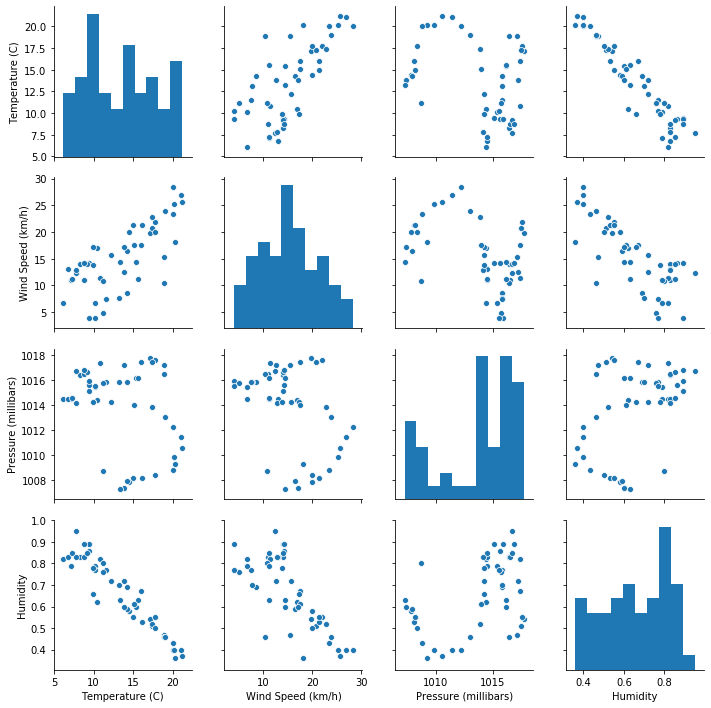

In [3]:
#seaborn pairplot
sns.pairplot(weather_data_m)

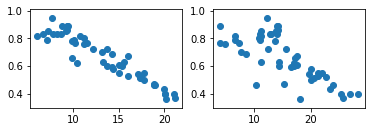

In [23]:
# Set the features of our model, these are our potential inputs
weather_features = ['Temperature (C)', 'Wind Speed (km/h)']

# Set the variable X to be all our input columns: Temperature, Wind Speed and Pressure
X = weather_data_m[weather_features]

# set y to be our output column: Humidity
y = weather_data_m.Humidity


# plt.subplot enables us to plot mutliple graphs
# we produce scatter plots for Humidity against each of our input variables

plt.subplot(2,2,1)
plt.scatter(X['Temperature (C)'],y)
plt.subplot(2,2,2)
plt.scatter(X['Wind Speed (km/h)'],y)


In [24]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [25]:
from sklearn.linear_model import LinearRegression
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
linear_model = LinearRegression()
# fitting the training data
linear_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_prediction =  linear_model.predict(x_test)
y_prediction

array([0.52097965, 0.38045255, 0.87808573, 0.59446668, 0.60727066,
       0.64790201, 0.75095738, 0.77374324, 0.78518864, 0.69624274])

In [27]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is ",score)
print("mean_sqrd_error (MSE) is == ",mean_squared_error(y_test,y_prediction, squared=False ))
print("root_mean_squared error (RMSE) is ==",mean_squared_error(y_test,y_prediction))

r2 socre is  0.8900032759550557
mean_sqrd_error (MSE) is ==  0.04603354091014347
root_mean_squared error (RMSE) is == 0.0021190868887258525


Text(0.5, 0, 'Humidity')

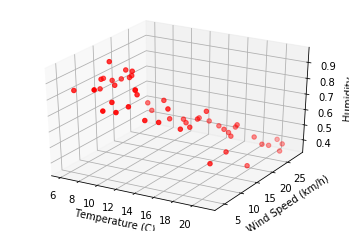

In [28]:
# Import library to produce a 3D plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x1 = X["Temperature (C)"]
x2 = X["Wind Speed (km/h)"]

ax.scatter(x1, x2, y, c='r', marker='o')

# Set axis labels
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Wind Speed (km/h)')
ax.set_zlabel('Humidity')